In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/airlines_flights_data.csv')

In [2]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [4]:
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df['departure_time']

,departure_time
0,Evening
1,Early_Morning
2,Early_Morning
3,Morning
4,Morning
...,...
300148,Morning
300149,Afternoon
300150,Early_Morning
300151,Early_Morning


In [7]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.drop(columns='index',inplace=True)

In [11]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [15]:
df[df['duration'] == df['duration'].max()]


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [17]:
df[df['price']==df['price'].max()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


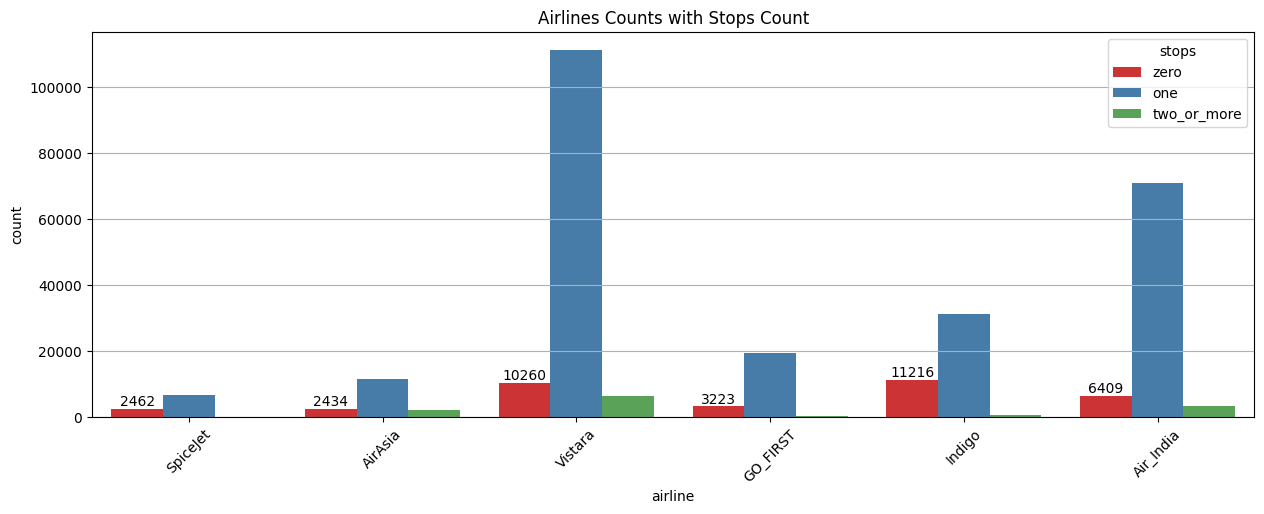

In [20]:
plt.figure(figsize=(15,5))
plt.grid()
plt.xticks(rotation=45)
plt.title('Airlines Counts with Stops Count')
ax=sns.countplot(data=df,x='airline',palette='Set1',hue='stops')
for i in ax.containers:
  ax.bar_label(i)
  plt.show()

In [21]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

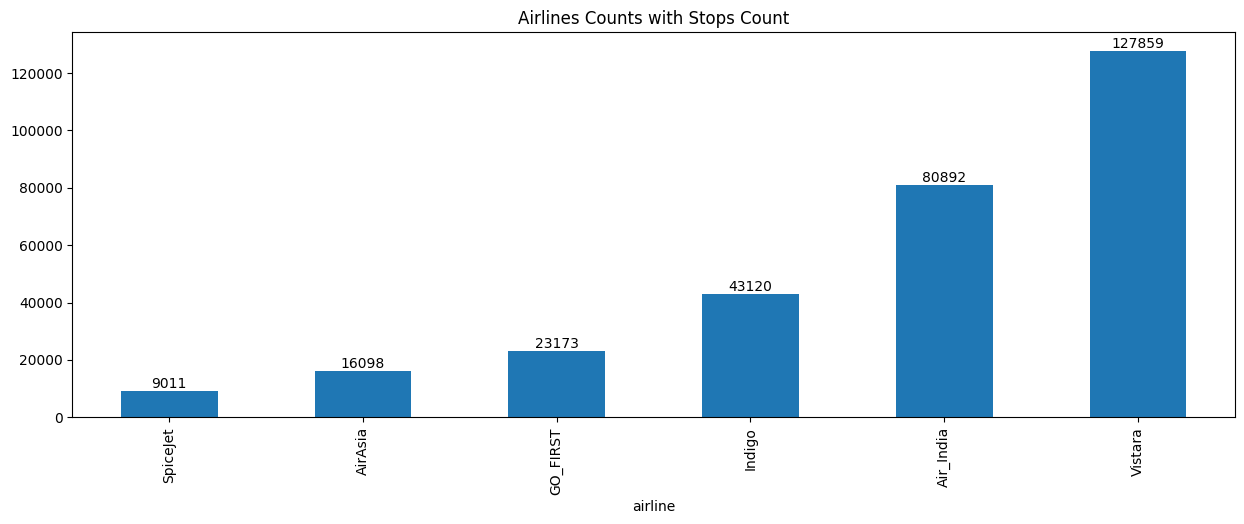

In [25]:
plt.figure(figsize=(15,5))
plt.grid()
plt.xticks(rotation=45)
plt.title('Airlines Counts with Stops Count')
ax=df['airline'].value_counts(ascending=True).plot.bar()
for i in ax.containers:
  ax.bar_label(i)
plt.show()



In [26]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

<Axes: xlabel='arrival_time'>

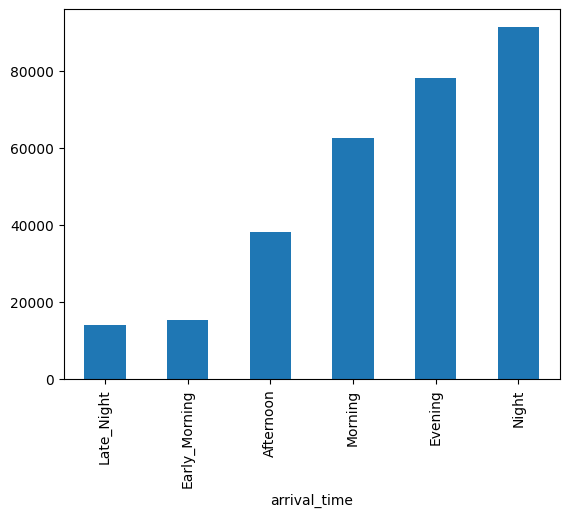

In [32]:
df['arrival_time'].value_counts(ascending=True).plot.bar()

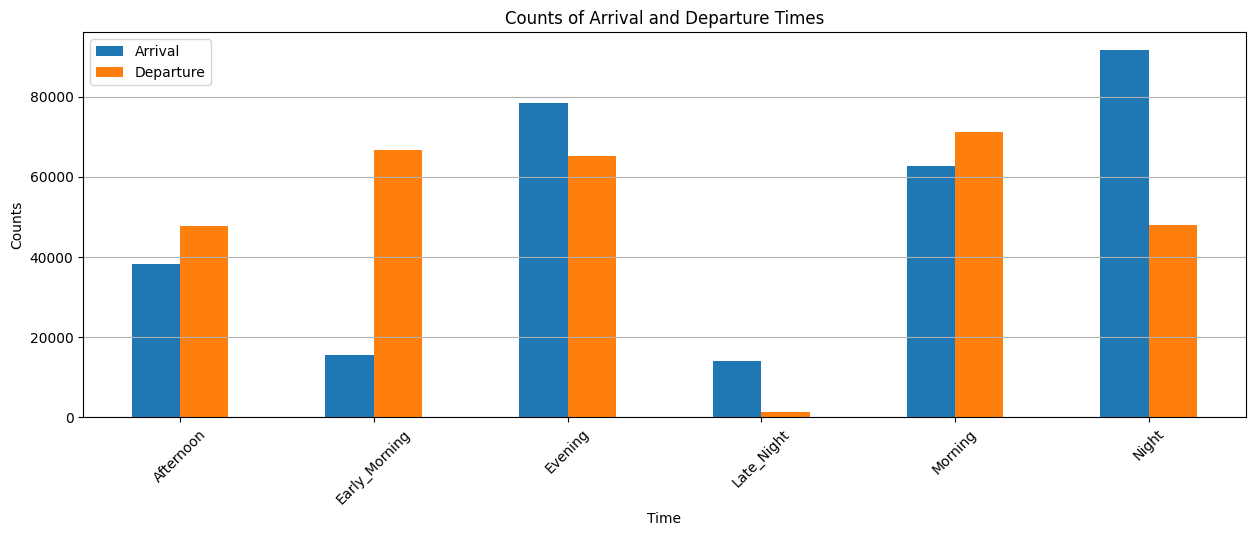

In [35]:
arrival_counts = df['arrival_time'].value_counts().sort_index()
departure_counts = df['departure_time'].value_counts().sort_index()
combined_counts = pd.DataFrame({
    'Arrival': arrival_counts,
    'Departure': departure_counts
}).fillna(0)  # fill NaNs with 0 if some times don't appear in both
combined_counts.plot(kind='bar', figsize=(15,5))
plt.title('Counts of Arrival and Departure Times')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [36]:
df['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [37]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [38]:
df['departure_time'].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [39]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [43]:
df['destination_city'].value_counts(ascending=True)

,count
destination_city,
Chennai,40368
Hyderabad,42726
Kolkata,49534
Bangalore,51068
Delhi,57360
Mumbai,59097


In [42]:
df['source_city'].value_counts(ascending=True)

,count
source_city,
Chennai,38700
Hyderabad,40806
Kolkata,46347
Bangalore,52061
Mumbai,60896
Delhi,61343


In [44]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [52]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

<Axes: xlabel='airline', ylabel='price'>

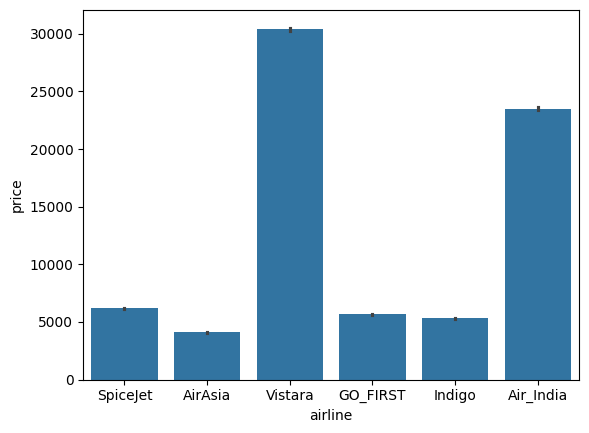

In [53]:
sns.barplot(data=df, x='airline', y='price')


<Axes: xlabel='airline', ylabel='price'>

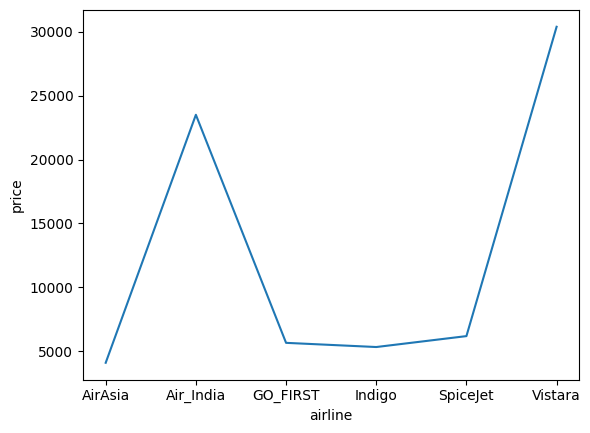

In [54]:
avg_price = df.groupby('airline')['price'].mean().reset_index()
sns.lineplot(data=avg_price, x='airline', y='price')


In [57]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

<Axes: xlabel='class', ylabel='count'>

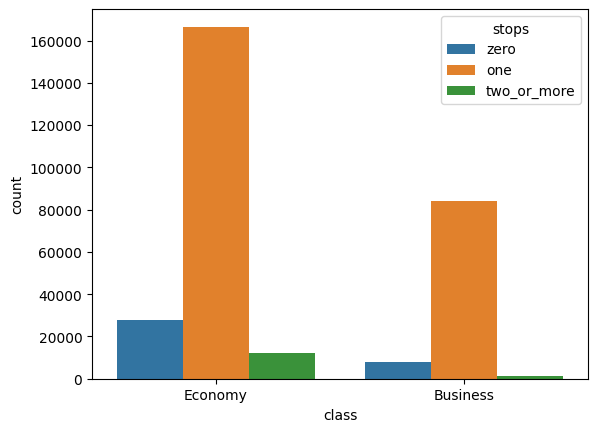

In [62]:
sns.countplot(data=df,x='class',hue='stops')

In [63]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [66]:
df.groupby('departure_time')['price'].mean(ascendin=true)

NameError: name 'true' is not defined

In [70]:
agx=df.groupby('departure_time')['price'].mean().sort_values(ascending=True).reset_index()


/tmp/ipython-input-232984534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agx,x='departure_time',y='price',palette='Set3')


<Axes: title={'center': 'Price Based on Departure Time'}, xlabel='departure_time', ylabel='price'>

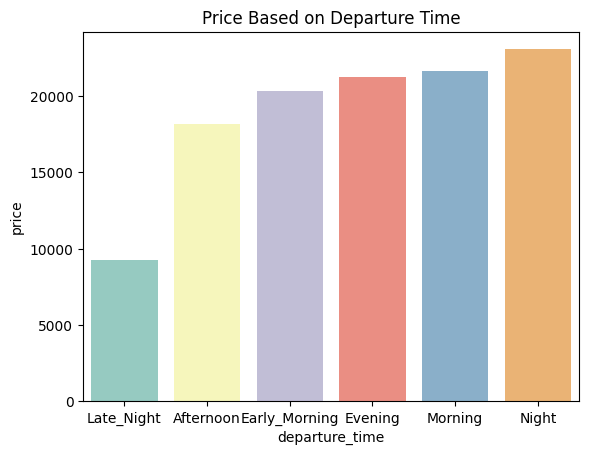

In [73]:
plt.title('Price Based on Departure Time')
sns.barplot(data=agx,x='departure_time',y='price',palette='Set3')

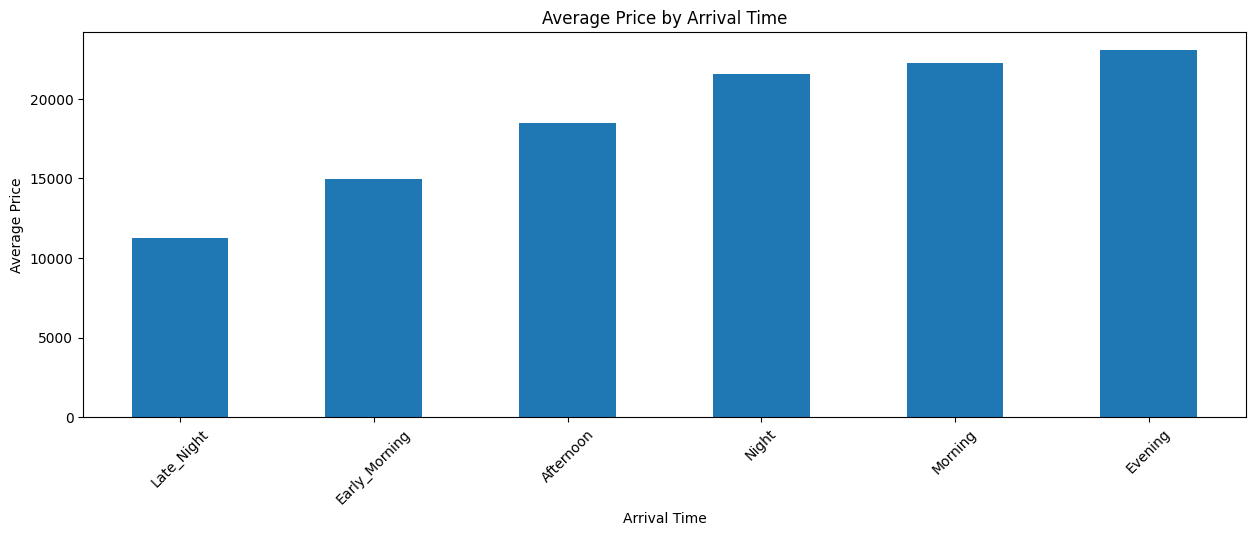

In [78]:
agx = df.groupby('arrival_time')['price'].mean().sort_values(ascending=True)

agx.plot(kind='bar', figsize=(15,5))
plt.title('Average Price by Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


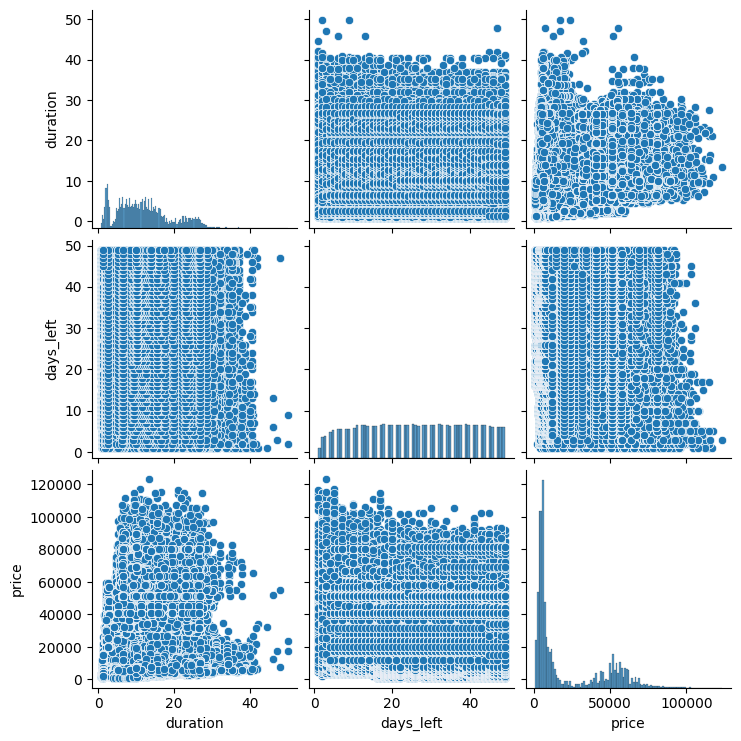

In [79]:
sns.pairplot(data=df)

In [80]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [82]:
df.groupby('source_city')['price'].mean().sort_values(ascending=True)

,price
source_city,
Delhi,18951.326639
Hyderabad,20155.623879
Bangalore,21469.460575
Mumbai,21483.818839
Kolkata,21746.235679
Chennai,21995.339871


In [83]:
df.groupby('destination_city')['price'].mean().sort_values(ascending=True)

,price
destination_city,
Delhi,18436.767870
Hyderabad,20427.661284
Mumbai,21372.529469
Bangalore,21593.955784
Chennai,21953.323969
Kolkata,21959.557556


In [84]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [85]:
df.groupby('days_left')['price'].mean().sort_values()

,price
days_left,
47,18553.272038
49,18992.971888
48,18998.126851
44,19049.080174
40,19144.972439
42,19154.261659
45,19199.876307
26,19238.290278
35,19255.652996


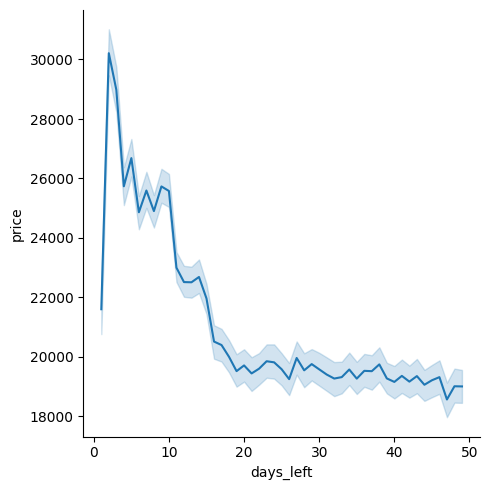

In [86]:
sns.relplot(y='price',x='days_left',kind='line',data=df)

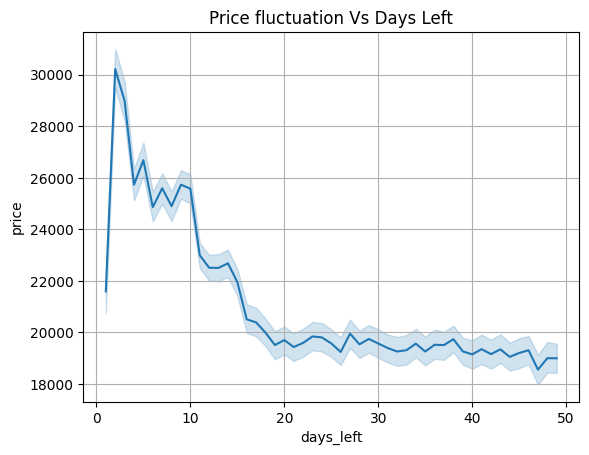

In [89]:
plt.title('Price fluctuation Vs Days Left')
sns.lineplot(data=df,x='days_left',y='price')
plt.grid()

In [90]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [91]:
cc=df.groupby('class')['price'].reset_index()

In [93]:
df.groupby('airline')['price'].mean().sort_values()

,price
airline,
AirAsia,4091.072742
Indigo,5324.216303
GO_FIRST,5652.007595
SpiceJet,6179.278881
Air_India,23507.019112
Vistara,30396.536302


In [98]:
df[(df['airline']=='Vistara') & (df['class']=='Business')&(df['source_city']=='Delhi') & (df['destination_city']=='Hyderabad')]['price'].mean()

np.float64(47939.840361445786)